                  TASK 26
 Assignemet on Home Loan Dataset Exploratory Data Analysis (EDA)  
 Project Topic Overview : Home Loan Risk & Approval Analysis

In [ ]:
 # Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2. Loading the  Dataset (Train Data set)

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
url= "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"
df = pd.read_csv(url)
df.head


<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

 3. Now Basic Info and Data Types

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
# copy and Read in data
df1 = df.copy()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [47]:
df1.info()
df1.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,4617.111564,1621.245798,137.365635,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2479.851729,2926.248369,55.779749,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [57]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

4. Missing Value Analysis

In [48]:
print("\nMissing Values per Column:")
print(df1.isnull().sum())

# Percentage of missing values
missing_percent = (df1.isnull().sum() / len(df1)) * 100
print("\nMissing Value Percentage:\n", missing_percent)

# # Visualize missing values
# plt.figure(figsize=(10,5))
# sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
# plt.title("Missing Values Heatmap")
# plt.show()


Missing Values per Column:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Missing Value Percentage:
 Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


In [58]:
# Lets check for missing values
missing = df1.isnull().sum()
missing_percent = (missing / len(df1)) * 100

# Keep only columns with missing values
missing = missing[missing > 0]
missing_percent = missing_percent[missing_percent > 0]

# Combine and format with "%" symbol
missing_table = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_percent.map("{:.2f}%".format)
}).sort_values(by='Missing Count', ascending=False)

print(missing_table)

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [61]:
def check_unique_values(df):
    """
    Prints the number of unique values and the unique entries
    for each column in the DataFrame.
    """
    for col in df1.select_dtypes(include='object'):
        unique_vals = df1[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique count: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}")

In [62]:
check_unique_values(df1)


Column: Loan_ID
Unique count: 614
Unique values: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 

In [63]:
def clean_loan_data(df1):
    # fill missing values
    for col in df1.select_dtypes(include='object'):
        df1[col].fillna(df1[col].mode()[0], inplace=True)
    for col in df1.select_dtypes(include=['int64', 'float64']):
        df1[col].fillna(df1[col].median(), inplace=True)

    # type conversions
    for col in df1.select_dtypes(include='object'):
        df1[col] = df1[col].astype('category')
        df1[col] = df1[col].str.strip().str.lower()


    return df1

In [64]:
df1_cleaned = clean_loan_data(df1)
df1_cleaned.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

5. Now we go into Data Cleaning of Train Data

In [49]:
# Fill categorical missing values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

# Fill numerical missing values with median
for col in ['LoanAmount', 'Loan_Amount_Term']:
    df1[col].fillna(df1[col].median(), inplace=True)

# Verify again
print("\nMissing values after cleaning:\n", df1.isnull().sum())


Missing values after cleaning:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


6. want to check for Outlier Detection & Treatment if possible on it.

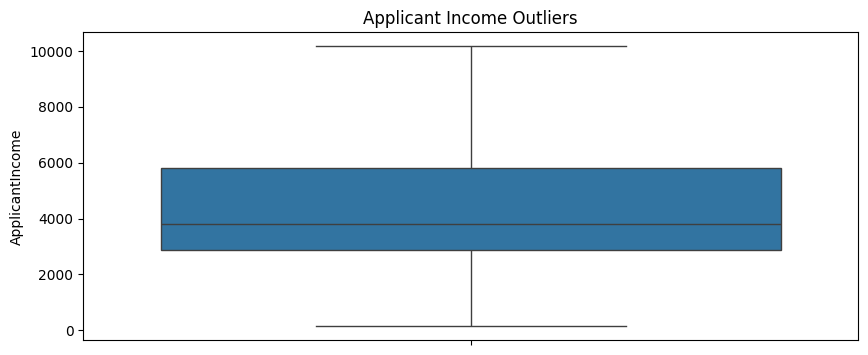

In [50]:
# Boxplot to detect outliers
plt.figure(figsize=(10,4))
sns.boxplot(df1['ApplicantIncome'])
plt.title("Applicant Income Outliers")
plt.show()

# Cap outliers using IQR method
for col in ['ApplicantIncome', 'LoanAmount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[col] = np.where(df1[col] > upper, upper, 
                       np.where(df1[col] < lower, lower, df1[col]))

 7. Univariate Analysis

In [65]:

def univariate_numerical_eda(df1, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df1[column].describe().to_frame())
    print(f"\nSkewness: {df1[column].skew():.3f}")
    print(f"Kurtosis: {df1[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df1[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df1[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df1[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df1[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


In [66]:
df1_cleaned['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [67]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [68]:
# Prints and returns all numerical columns in the DataFrame.
numerical_features = df1_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Features:\n{numerical_features}")

Numerical Features:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [69]:
def univariate_numerical_eda(df1_cleaned, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, boxplot, 
    and intelligent suggestions for skew/kurtosis handling (for ML preprocessing).
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    print(f"\nFeature: {column}")
    print("="*45)
    print(df1_cleaned[column].describe().to_frame())

    # --- Summary ---
    total = len(df1_cleaned[column])
    missing = df1_cleaned[column].isna().sum()
    unique = df1_cleaned[column].nunique()
    

  
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
   
    
    skew = df1_cleaned[column].skew()
    kurt = df1_cleaned[column].kurt()
    
    print(f"\nSkewness: {skew:.3f}")
    print(f"Kurtosis: {kurt:.3f}")

     # ====== INTERPRETATION (Stricter ML-based) ======

    # --- Skewness interpretation ---
    
    if abs(skew) > 0.7:
        skew_status = "high"
        print(f"\n{column} is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.")
    elif abs(skew) > 0.3:
        skew_status = "moderate"
        print(f"{column} is mildly skewed. A mild transformation (√ or cube root) may help.")
    else:
        skew_status = "normal"
        print(f"{column} is fairly symmetric — no transformation likely needed.")

    # --- Kurtosis interpretation ---
    if abs(kurt) > 1.0:
        kurt_status = "high"
        print(f"{column} shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.")
    elif abs(kurt) > 0.5:
        kurt_status = "moderate"
        print(f"{column} has mildly heavy tails. Light transformation or scaling may help.")
    else:
        kurt_status = "normal"
        print(f"{column} has fairly normal kurtosis — suitable for most ML models.")

    # ====== COMBINED LOGIC ======
    if (skew_status in ["high", "moderate"]) and kurt_status == "normal":
        print("\n You can focus on correcting the skew only (e.g., log-transform), "
              "no need for outlier-heavy corrections.")
    elif (skew_status in ["high", "moderate"]) and (kurt_status in ["high", "moderate"]):
        print("\n The variable is both skewed and heavy-tailed. Consider both transformation "
              "and outlier treatment.")
    elif skew_status == "normal" and kurt_status == "normal":
        print("\n The variable is approximately normal — no transformation needed.")

    # ====== PLOTS ======
    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df1_cleaned[column], kde=True, bins=30, color='salmon')
    plt.title(f'\nDistribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df1_cleaned[column], color='seagreen')
    plt.title(f'\nBoxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()


Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       4617.111564
std        2479.851729
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.250000
Missing values: 0 (0.00%)
Unique categories: 458

Skewness: 1.040
Kurtosis: 0.126

ApplicantIncome is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
ApplicantIncome has fairly normal kurtosis — suitable for most ML models.

 You can focus on correcting the skew only (e.g., log-transform), no need for outlier-heavy corrections.


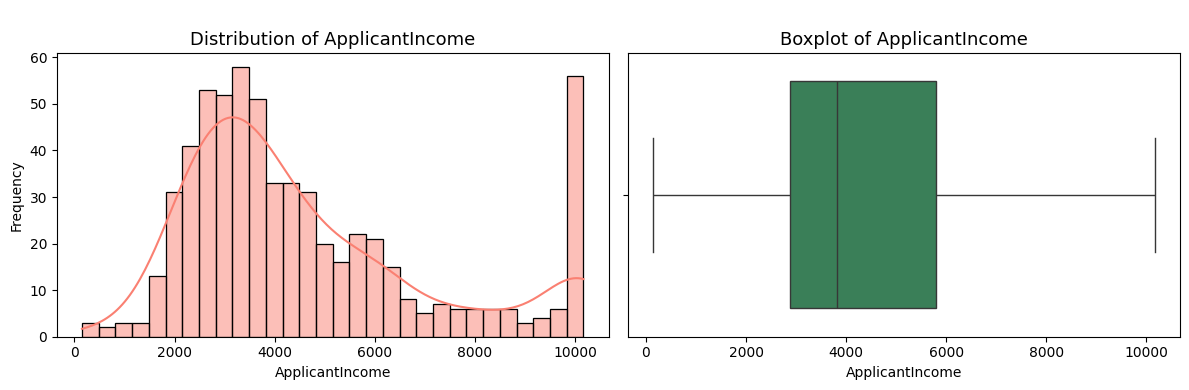


Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000
Missing values: 0 (0.00%)
Unique categories: 287

Skewness: 7.492
Kurtosis: 84.956

CoapplicantIncome is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
CoapplicantIncome shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


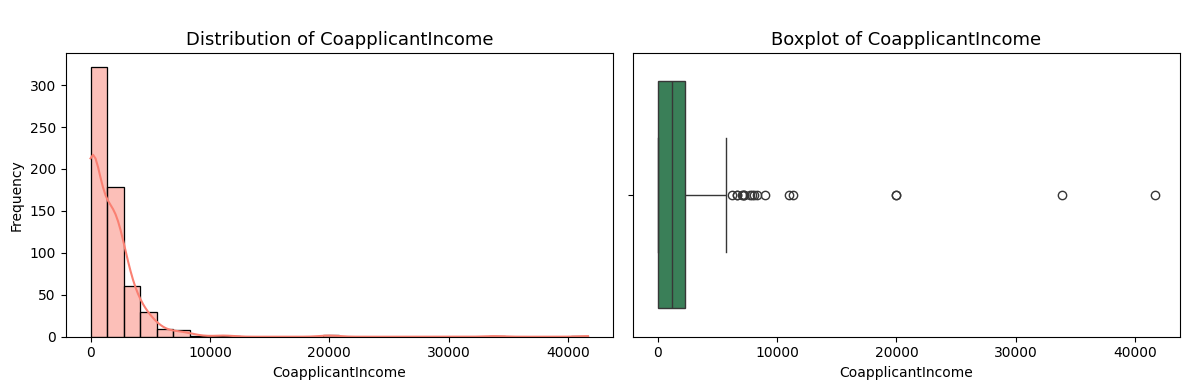


Feature: LoanAmount
       LoanAmount
count  614.000000
mean   137.365635
std     55.779749
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    261.500000
Missing values: 0 (0.00%)
Unique categories: 168

Skewness: 0.684
Kurtosis: 0.112
LoanAmount is mildly skewed. A mild transformation (√ or cube root) may help.
LoanAmount has fairly normal kurtosis — suitable for most ML models.

 You can focus on correcting the skew only (e.g., log-transform), no need for outlier-heavy corrections.


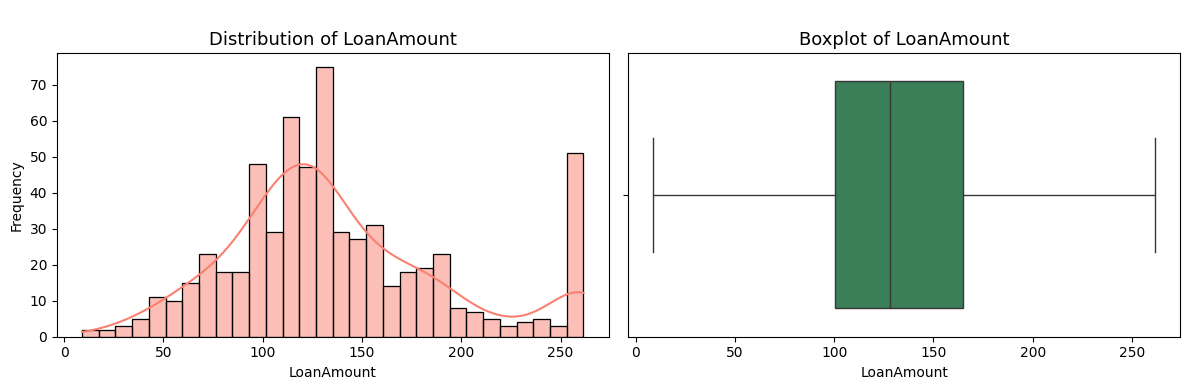


Feature: Loan_Amount_Term
       Loan_Amount_Term
count        614.000000
mean         342.410423
std           64.428629
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000
Missing values: 0 (0.00%)
Unique categories: 10

Skewness: -2.402
Kurtosis: 6.925

Loan_Amount_Term is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
Loan_Amount_Term shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


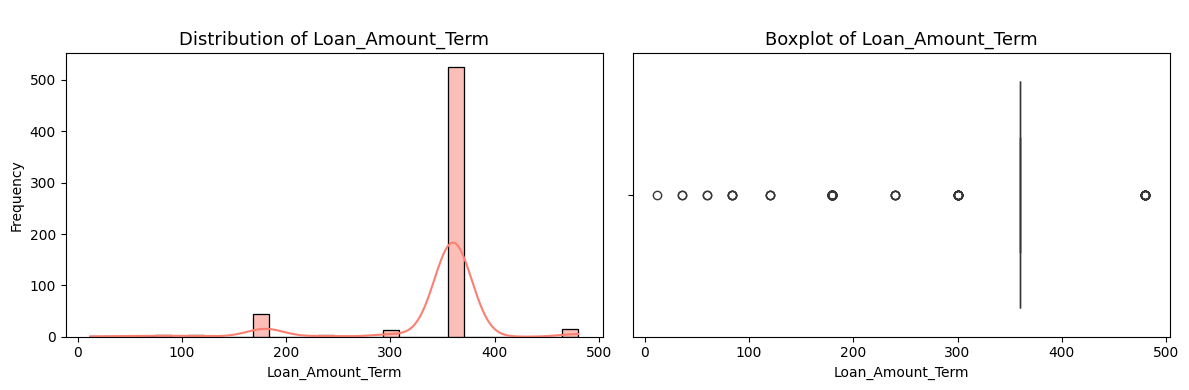


Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Missing values: 0 (0.00%)
Unique categories: 2

Skewness: -2.022
Kurtosis: 2.095

Credit_History is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.
Credit_History shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.

 The variable is both skewed and heavy-tailed. Consider both transformation and outlier treatment.


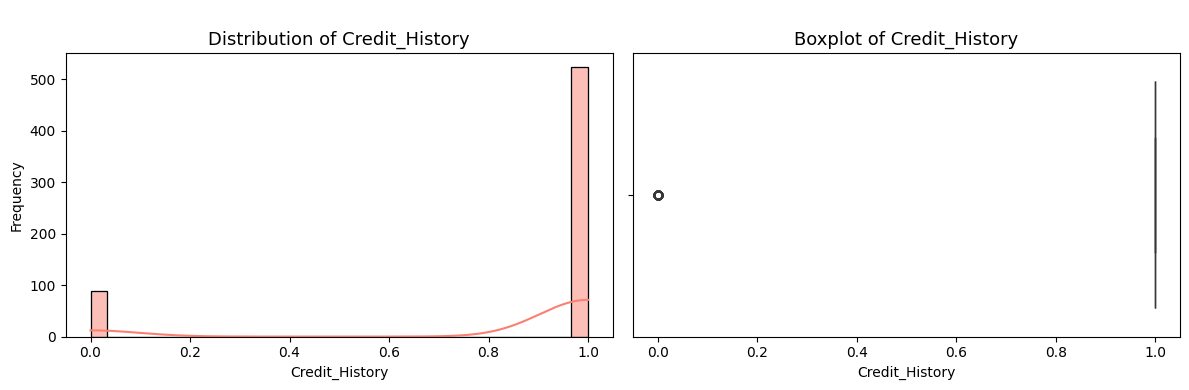

In [70]:
# We can loop to save time
for col in numerical_features:
    univariate_numerical_eda(df1_cleaned, col)

8. cont.

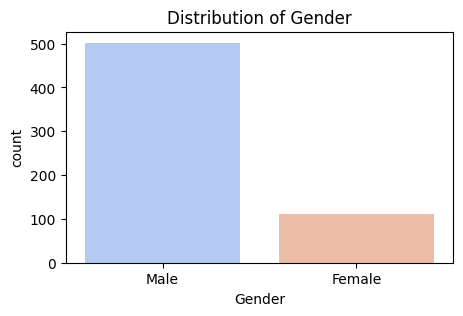

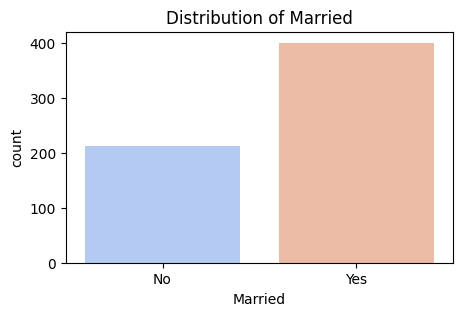

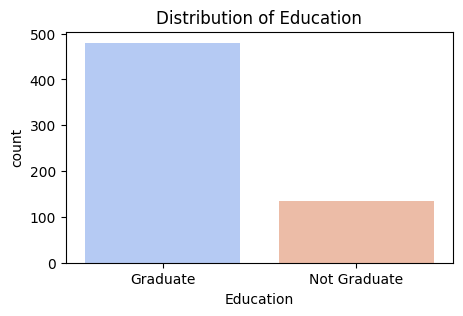

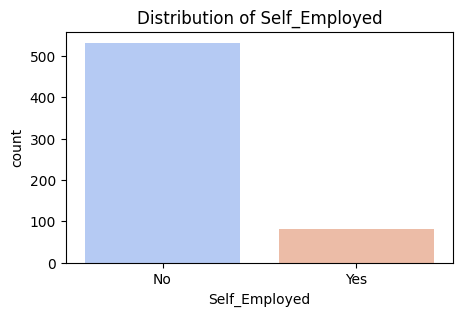

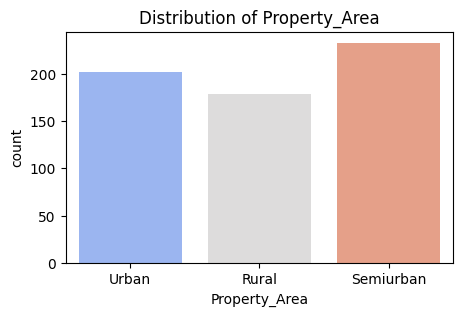

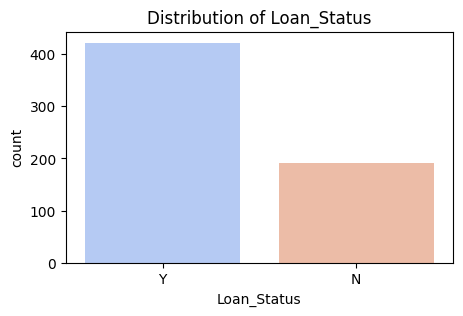

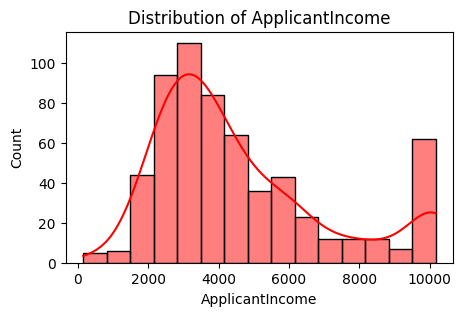

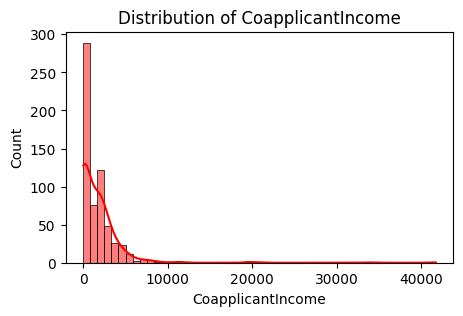

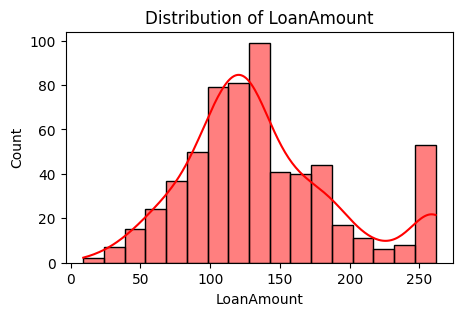

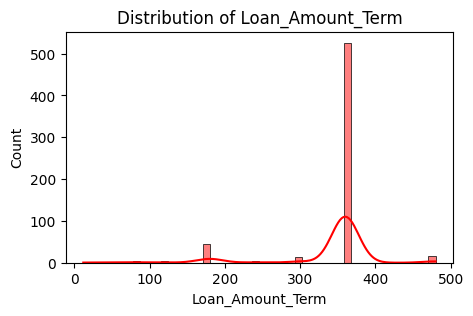

In [71]:
from pandas import Categorical
# Univariate Analysis

# Categorical Features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 
                    'Property_Area', 'Loan_Status']

for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f"Distribution of {col}")
    plt.show()
# Numerical Features
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df1[col], kde=True, color='Red')
    plt.title(f"Distribution of {col}")
    plt.show()





In [75]:
def univariate_categorical_eda(df1_cleaned, column):
    """
    Performs univariate EDA on a single categorical column.
    Displays frequency distribution, proportion, missing values,
    and visualizations (bar plot + pie chart).
    Provides ML preprocessing suggestions.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd

    print(f"\nFeature: {column}")
    print("="*45)

    # --- Summary ---
    total = len(df1_cleaned[column])
    missing = df1_cleaned[column].isna().sum()
    unique = df1_cleaned[column].nunique()
    mode_val = df1_cleaned[column].mode()[0] if unique > 0 else None

    print(f"Total observations: {total}")
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
    print(f"Most frequent category: {mode_val}")

    # --- Frequency Table ---
    freq = df1_cleaned[column].value_counts(dropna=False)
    perc = df1_cleaned[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': perc.round(2)})
    print("\nCategory Distribution:")
    print(summary)

    # --- Visualization ---
    plt.figure(figsize=(12,4))

    # Bar Plot
    plt.subplot(1,2,1)
    sns.countplot(x=df1_cleaned[column], palette='Set2', order=freq.index,color='red')
    plt.title(f"Frequency of {column}", fontsize=13)
    plt.xticks(rotation=30, ha='right')
    

    # Pie Chart
    plt.subplot(1,2,2)
    plt.pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Proportion of {column}", fontsize=13)

    plt.tight_layout()
    plt.show()

    # --- ML Preprocessing Suggestions ---
    if unique == 2:
        print(f" {column} is binary — suitable for Label Encoding (0/1).")
    elif 2 < unique <= 10:
        print(f" {column} has moderate categories — use One-Hot Encoding.")
    elif unique > 10:
        print(f"{column} has many unique categories — consider frequency encoding or feature grouping.")
    else:
        print(f"{column} seems low cardinality — standard encoding should work fine.")

    if (missing / total) > 0.05:
        print(f" Missing values exceed 5% — consider imputing or flagging missingness.")

In [73]:
# Prints and returns all categorical columns in the DataFrame.
categorical_features = df1_cleaned.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features:\n{categorical_features}")

Categorical Features:
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']



Feature: Loan_ID
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 614
Most frequent category: lp001002

Category Distribution:
          Count  Percentage
Loan_ID                    
lp001002      1        0.16
lp001003      1        0.16
lp001005      1        0.16
lp001006      1        0.16
lp001008      1        0.16
...         ...         ...
lp002978      1        0.16
lp002979      1        0.16
lp002983      1        0.16
lp002984      1        0.16
lp002990      1        0.16

[614 rows x 2 columns]


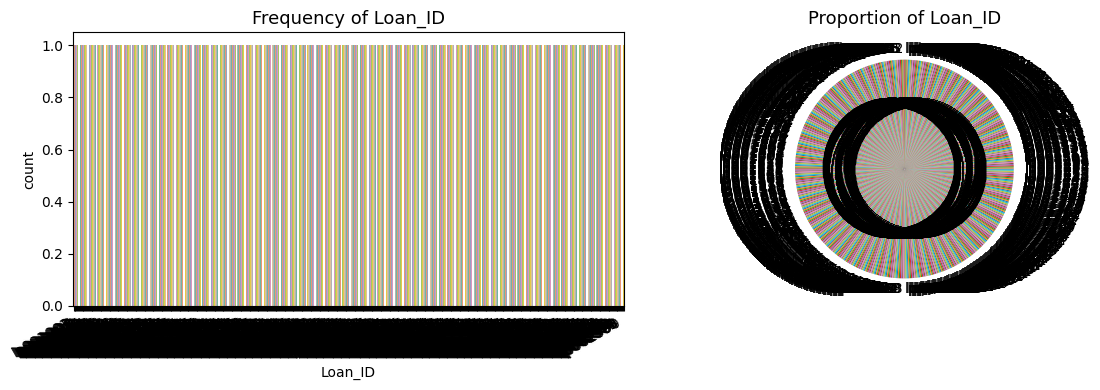

Loan_ID has many unique categories — consider frequency encoding or feature grouping.

Feature: Gender
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: male

Category Distribution:
        Count  Percentage
Gender                   
male      502       81.76
female    112       18.24


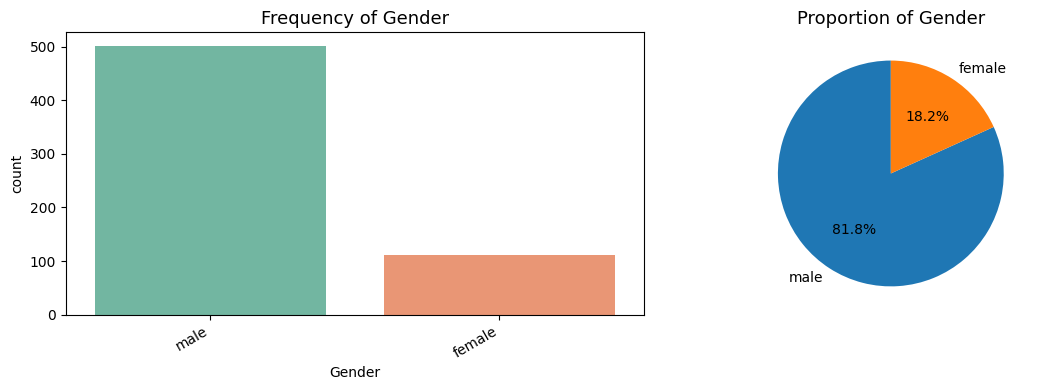

 Gender is binary — suitable for Label Encoding (0/1).

Feature: Married
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: yes

Category Distribution:
         Count  Percentage
Married                   
yes        401       65.31
no         213       34.69


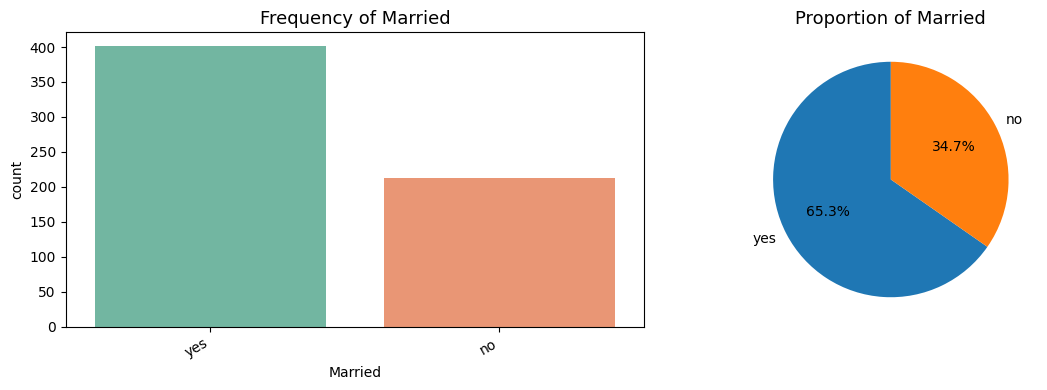

 Married is binary — suitable for Label Encoding (0/1).

Feature: Dependents
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 4
Most frequent category: 0

Category Distribution:
            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31


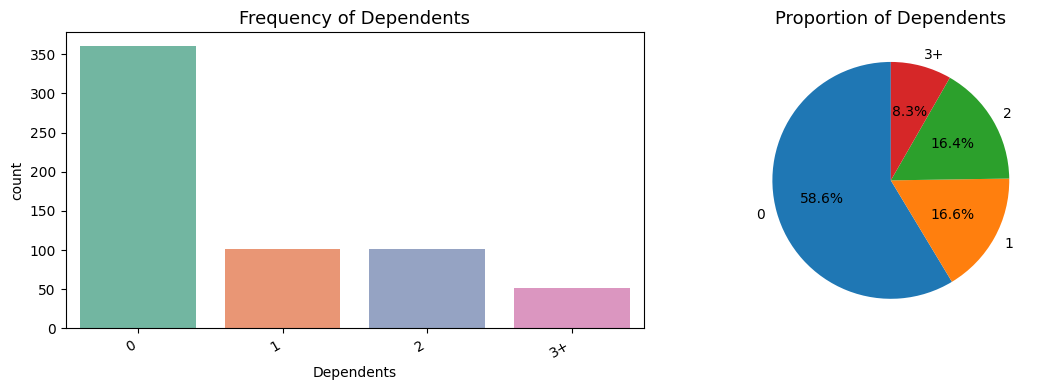

 Dependents has moderate categories — use One-Hot Encoding.

Feature: Education
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: graduate

Category Distribution:
              Count  Percentage
Education                      
graduate        480       78.18
not graduate    134       21.82


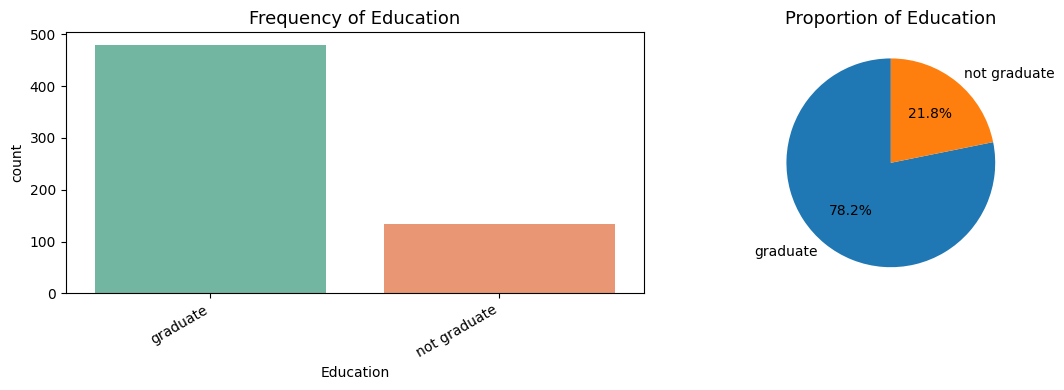

 Education is binary — suitable for Label Encoding (0/1).

Feature: Self_Employed
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: no

Category Distribution:
               Count  Percentage
Self_Employed                   
no               532       86.64
yes               82       13.36


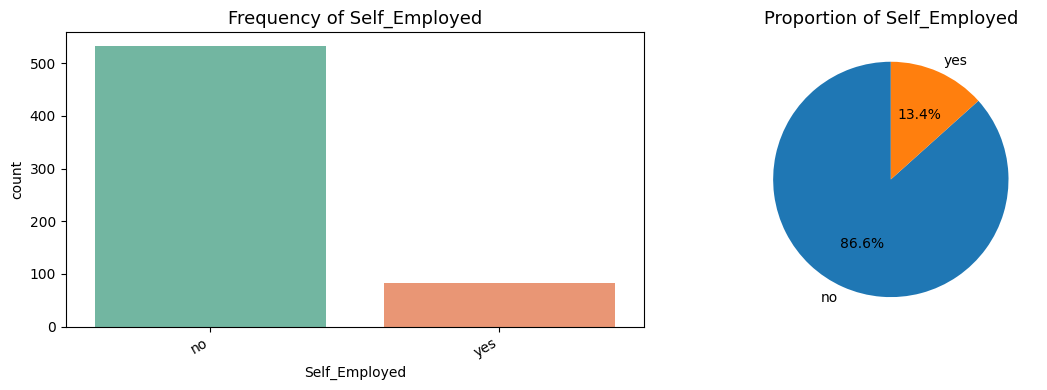

 Self_Employed is binary — suitable for Label Encoding (0/1).

Feature: Property_Area
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 3
Most frequent category: semiurban

Category Distribution:
               Count  Percentage
Property_Area                   
semiurban        233       37.95
urban            202       32.90
rural            179       29.15


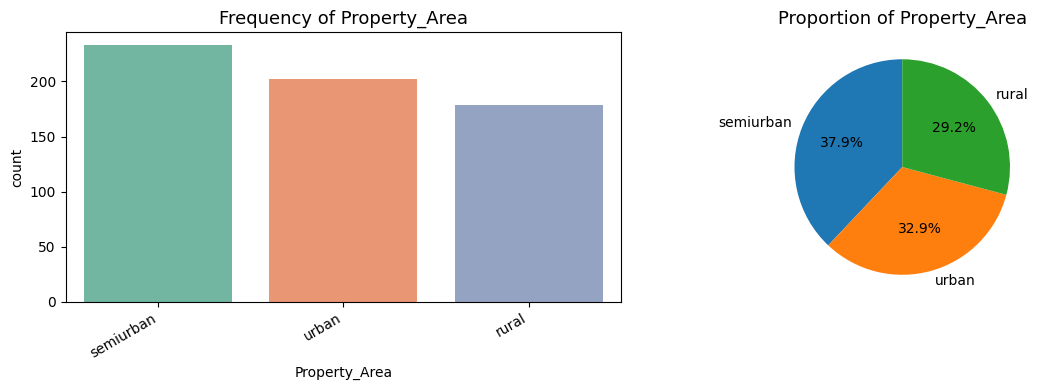

 Property_Area has moderate categories — use One-Hot Encoding.

Feature: Loan_Status
Total observations: 614
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: y

Category Distribution:
             Count  Percentage
Loan_Status                   
y              422       68.73
n              192       31.27


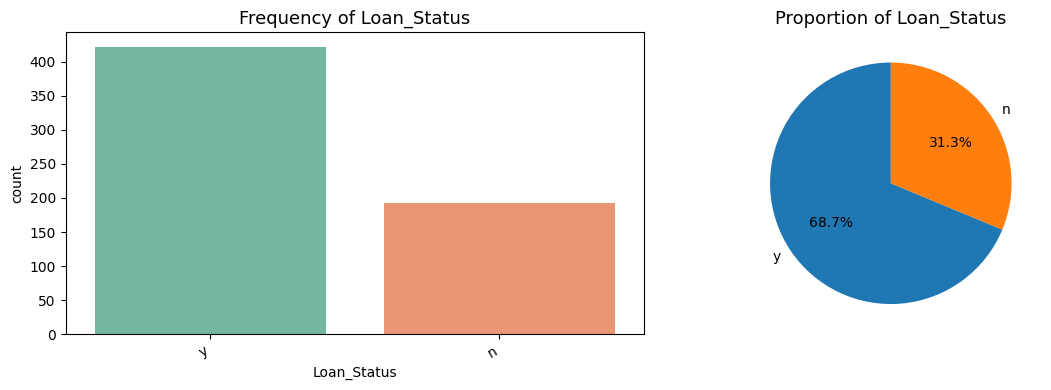

 Loan_Status is binary — suitable for Label Encoding (0/1).


In [74]:
# We can loop to save time
for col in categorical_features:
    univariate_categorical_eda(df1_cleaned, col)

9.  checking after treatment

In [54]:
df1[['ApplicantIncome', 'LoanAmount']].describe()


,ApplicantIncome,LoanAmount
count,614.000000,614.000000
mean,4617.111564,137.365635
std,2479.851729,55.779749
min,150.000000,9.000000
25%,2877.500000,100.250000
50%,3812.500000,128.000000
75%,5795.000000,164.750000
max,10171.250000,261.500000


In [76]:
check_unique_values(df1_cleaned)


Column: Loan_ID
Unique count: 614
Unique values: ['lp001002' 'lp001003' 'lp001005' 'lp001006' 'lp001008' 'lp001011'
 'lp001013' 'lp001014' 'lp001018' 'lp001020' 'lp001024' 'lp001027'
 'lp001028' 'lp001029' 'lp001030' 'lp001032' 'lp001034' 'lp001036'
 'lp001038' 'lp001041' 'lp001043' 'lp001046' 'lp001047' 'lp001050'
 'lp001052' 'lp001066' 'lp001068' 'lp001073' 'lp001086' 'lp001087'
 'lp001091' 'lp001095' 'lp001097' 'lp001098' 'lp001100' 'lp001106'
 'lp001109' 'lp001112' 'lp001114' 'lp001116' 'lp001119' 'lp001120'
 'lp001123' 'lp001131' 'lp001136' 'lp001137' 'lp001138' 'lp001144'
 'lp001146' 'lp001151' 'lp001155' 'lp001157' 'lp001164' 'lp001179'
 'lp001186' 'lp001194' 'lp001195' 'lp001197' 'lp001198' 'lp001199'
 'lp001205' 'lp001206' 'lp001207' 'lp001213' 'lp001222' 'lp001225'
 'lp001228' 'lp001233' 'lp001238' 'lp001241' 'lp001243' 'lp001245'
 'lp001248' 'lp001250' 'lp001253' 'lp001255' 'lp001256' 'lp001259'
 'lp001263' 'lp001264' 'lp001265' 'lp001266' 'lp001267' 'lp001273'
 'lp001275' 

In [77]:
# Label encoding based on logical binary mapping
df1_cleaned['Gender'] = df1_cleaned['Gender'].map({'male': 1, 'female': 0})
df1_cleaned['Married'] = df1_cleaned['Married'].map({'yes': 1, 'no': 0})
df1_cleaned['Education'] = df1_cleaned['Education'].map({'graduate': 1, 'not graduate': 0})
df1_cleaned['Self_Employed'] = df1_cleaned['Self_Employed'].map({'yes': 1, 'no': 0})
df1_cleaned['Loan_Status'] = df1_cleaned['Loan_Status'].map({'y': 1, 'n': 0})

# One-hot encode Property_Area
df1_cleaned = pd.get_dummies(df1_cleaned, columns=['Property_Area'], prefix='Property', drop_first=False, dtype=int)

df1_cleaned

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_rural,Property_semiurban,Property_urban
0,lp001002,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,1,0,0,1
1,lp001003,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,1,0,0
2,lp001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,1,0,0,1
3,lp001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,1,0,0,1
4,lp001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,lp002978,0,0,0,1,0,2900.0,0.0,71.0,360.0,1.0,1,1,0,0
610,lp002979,1,1,3+,1,0,4106.0,0.0,40.0,180.0,1.0,1,1,0,0
611,lp002983,1,1,1,1,0,8072.0,240.0,253.0,360.0,1.0,1,0,0,1
612,lp002984,1,1,2,1,0,7583.0,0.0,187.0,360.0,1.0,1,0,0,1


In [78]:
# Lets find the numerical features
num_features = df1_cleaned.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(df1_cleaned[num_features])
num_features.head(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_rural,Property_semiurban,Property_urban
0,1,0,1,0,5849.0,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,1,0,0


10. Bivariate Analysis

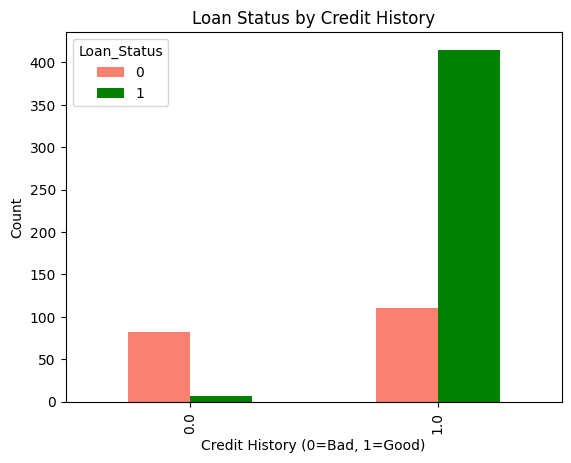

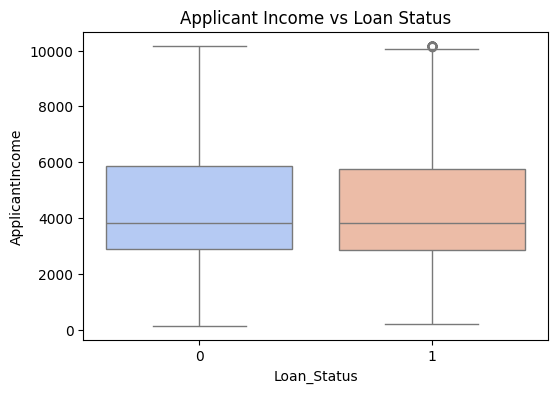

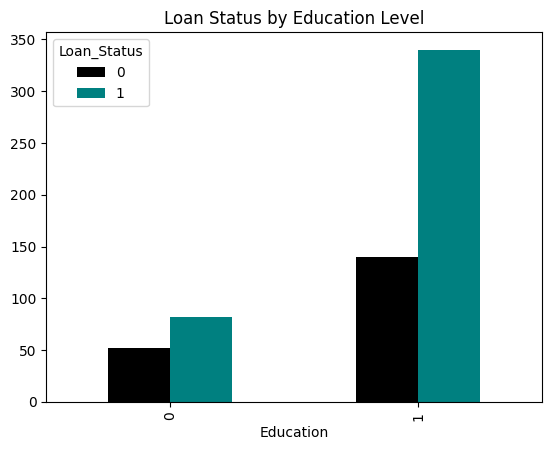

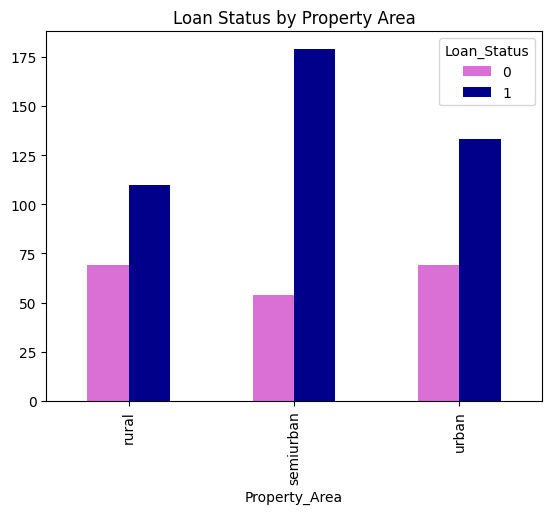

1

In [79]:
# Bivariate Analysis

# Credit History vs Loan Status
credit_loan = pd.crosstab(df1['Credit_History'], df1['Loan_Status'])
credit_loan.plot(kind='bar', color=['salmon', 'green'])
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History (0=Bad, 1=Good)")
plt.ylabel("Count")
plt.show()

# Income vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df1, palette='coolwarm')
plt.title("Applicant Income vs Loan Status")
plt.show()

# Education vs Loan Status
edu_loan = pd.crosstab(df1['Education'], df1['Loan_Status'])
edu_loan.plot(kind='bar', color=['black', 'teal'])
plt.title("Loan Status by Education Level")
plt.show()

# Property Area vs Loan Status
prop_loan = pd.crosstab(df1['Property_Area'], df1['Loan_Status'])
prop_loan.plot(kind='bar', color=['orchid', 'darkblue'])
plt.title("Loan Status by Property Area")
plt.show()
1


In [80]:
def correlation_with_target(df1_cleaned, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    #numeric_df = df1.select_dtypes(include='number').copy()
    #numeric_df = df1.select_dtypes(include=['int64', 'float64']).columns
    #num_features
    if target_col not in num_features.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = num_features.corrwith(num_features[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)
    

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

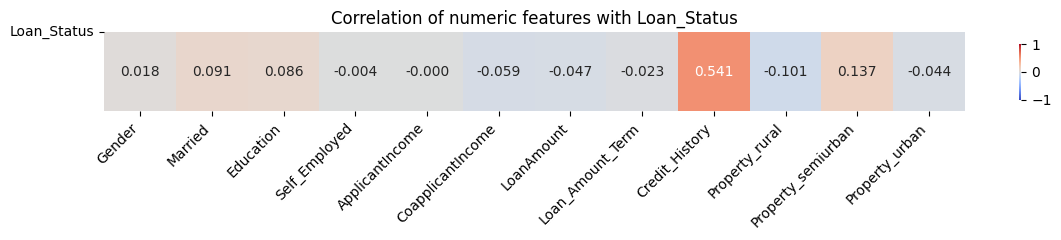

Credit_History        0.540556
Property_semiurban    0.136540
Property_rural       -0.100694
Married               0.091478
Education             0.085884
CoapplicantIncome    -0.059187
LoanAmount           -0.047262
Property_urban       -0.043621
Loan_Amount_Term     -0.022549
Gender                0.017987
Self_Employed        -0.003700
ApplicantIncome      -0.000442
dtype: float64


In [81]:
corr_series = correlation_with_target(df1_cleaned, 'Loan_Status', figsize=(12,2.5))
print(corr_series) 

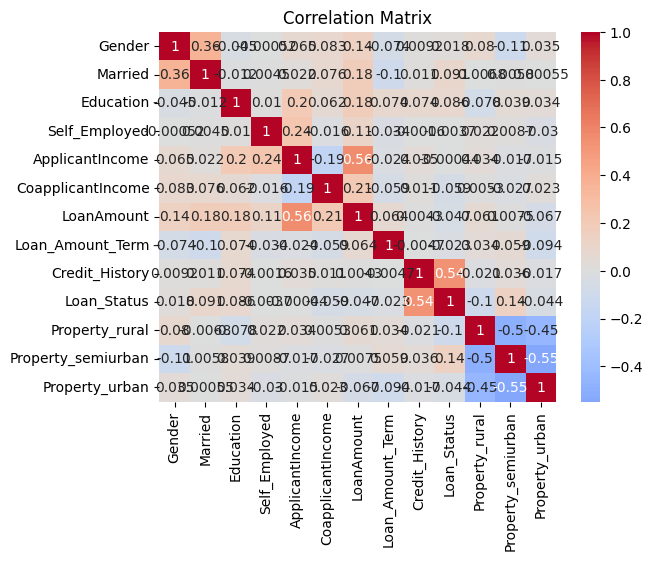

In [82]:
corr = num_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

12. finally we need nto do Correlation Analysis

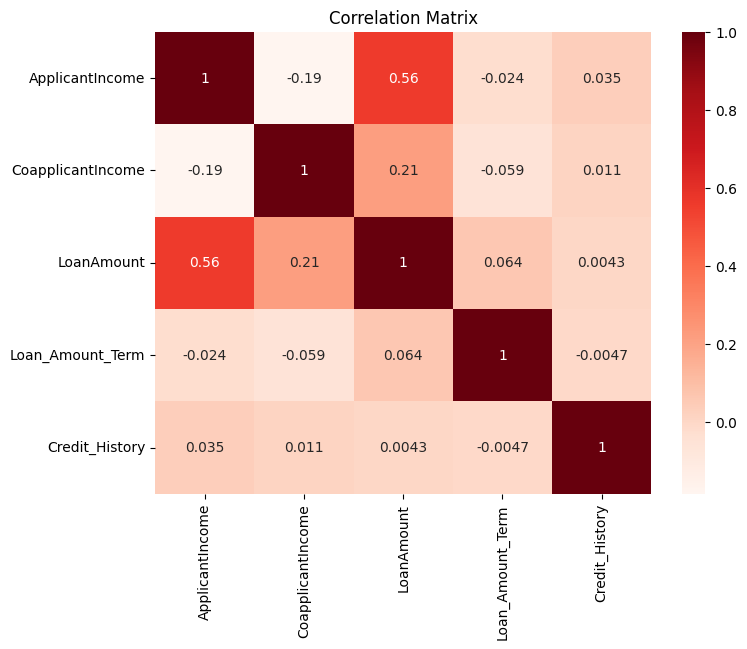

In [56]:
plt.figure(figsize=(8,6))
corr = df1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()


In [83]:
encoded_property_cols = [col for col in df1_cleaned.columns if col.startswith('Property_')]

for col in categorical_features:
    if col != 'Property_Area':
        ct = pd.crosstab(df1_cleaned[col], df1_cleaned['Loan_Status'], normalize='index') * 100
        print(f"\n{col} vs Loan Status:\n", ct.round(1))
    else:
        for prop_col in encoded_property_cols:
            ct = pd.crosstab(df1_cleaned[prop_col], df1_cleaned['Loan_Status'], normalize='index') * 100
            print(f"\n{prop_col} vs Loan Status:\n", ct.round(1))


Loan_ID vs Loan Status:
 Loan_Status      0      1
Loan_ID                  
lp001002       0.0  100.0
lp001003     100.0    0.0
lp001005       0.0  100.0
lp001006       0.0  100.0
lp001008       0.0  100.0
...            ...    ...
lp002978       0.0  100.0
lp002979       0.0  100.0
lp002983       0.0  100.0
lp002984       0.0  100.0
lp002990     100.0    0.0

[614 rows x 2 columns]

Gender vs Loan Status:
 Loan_Status     0     1
Gender                 
0            33.0  67.0
1            30.9  69.1

Married vs Loan Status:
 Loan_Status     0     1
Married                
0            37.1  62.9
1            28.2  71.8

Dependents vs Loan Status:
 Loan_Status     0     1
Dependents             
0            31.4  68.6
1            35.3  64.7
2            24.8  75.2
3+           35.3  64.7

Education vs Loan Status:
 Loan_Status     0     1
Education              
0            38.8  61.2
1            29.2  70.8

Self_Employed vs Loan Status:
 Loan_Status       0     1
Self_Employed 

In [85]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df1_cleaned, x_col, y_col):
    """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """

    # Calculate correlation coefficient
    corr, p_value = pearsonr(df1_cleaned[x_col], df1_cleaned[y_col])

    # Create plot
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df1_cleaned, x=x_col, y=y_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    # Title and labels
    plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

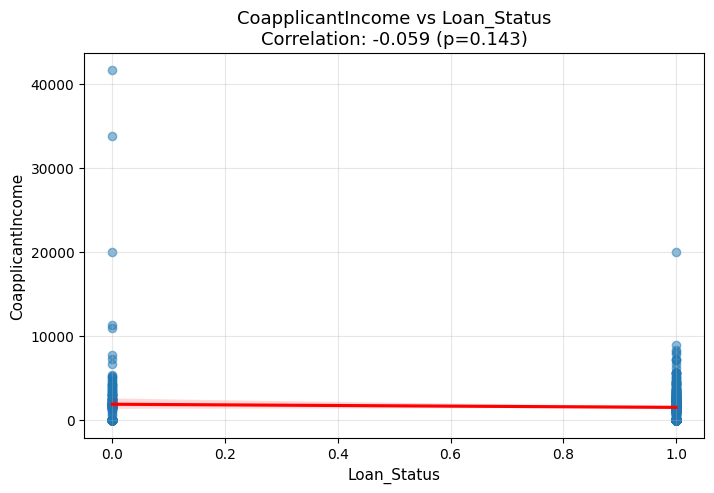

In [88]:
numeric_bivariate_plot(df1, 'Loan_Status', 'CoapplicantIncome')


In [89]:
def plot_feature_relationships(df1_cleaned, target='Loan_Status', num_features=None):
    """
    Plots scatter plots for numerical features vs target variable.
    Works well when target is binary (0/1).
    """
    
    if num_features is None:
        num_features = df1_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Ensure target exists
    if target not in df1_cleaned.columns:
        raise ValueError(f"Target column '{target}' not found in DataFrame.")
    
    # Drop the target from the feature list
    if target in num_features:
        num_features.remove(target)
    
    print(f"📊 Generating scatter plots for {len(num_features)} numerical features...\n")

    for col in num_features:
        plt.figure(figsize=(6, 4))
        #sns.scatterplot(data=df1_cleaned, x=col, y=target, alpha=0.6)
        plt.figure(figsize=(8, 5))
        sns.regplot(data=df1_cleaned, x=col, y=target, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.grid(alpha=0.3)
        plt.show()

📊 Generating scatter plots for 5 numerical features...



<Figure size 600x400 with 0 Axes>

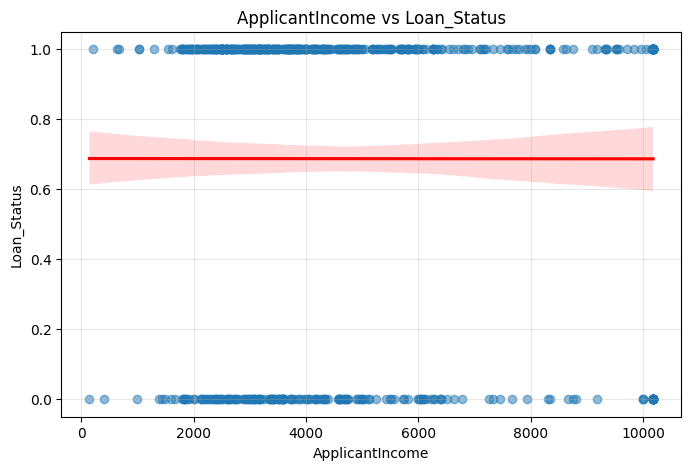

<Figure size 600x400 with 0 Axes>

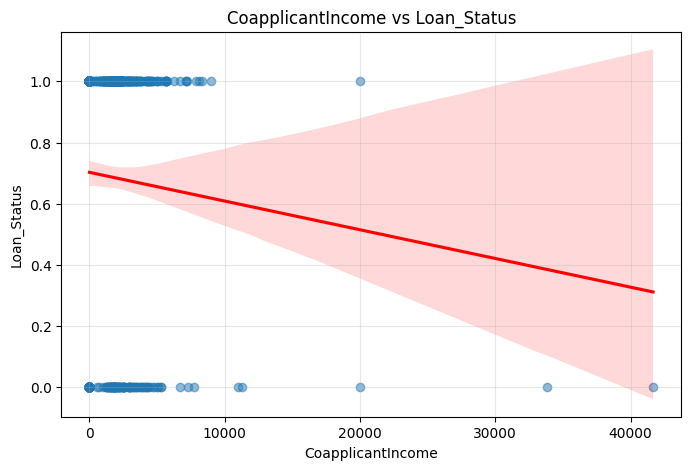

<Figure size 600x400 with 0 Axes>

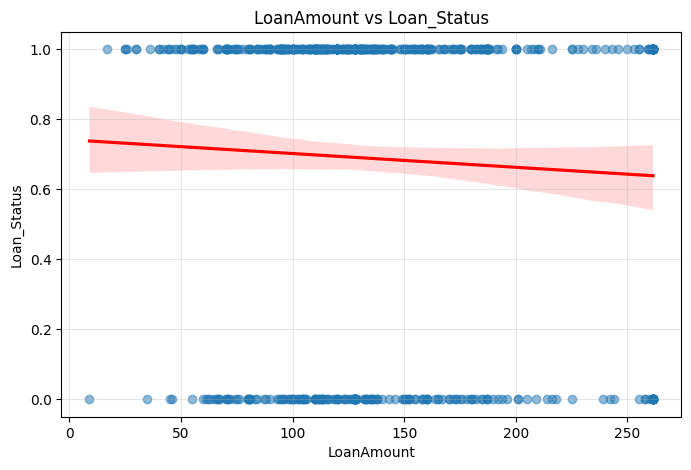

<Figure size 600x400 with 0 Axes>

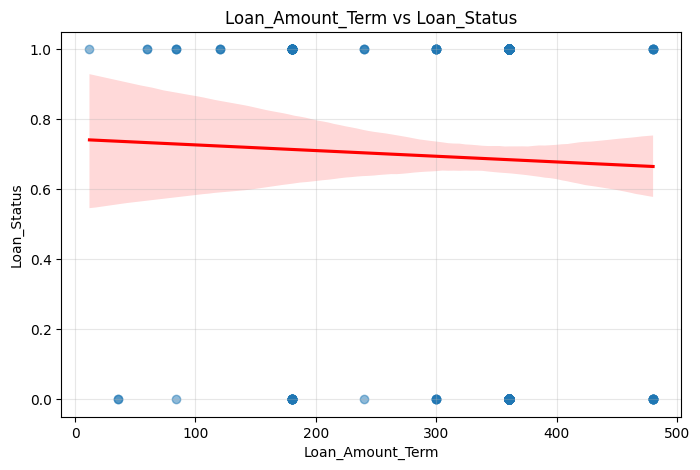

<Figure size 600x400 with 0 Axes>

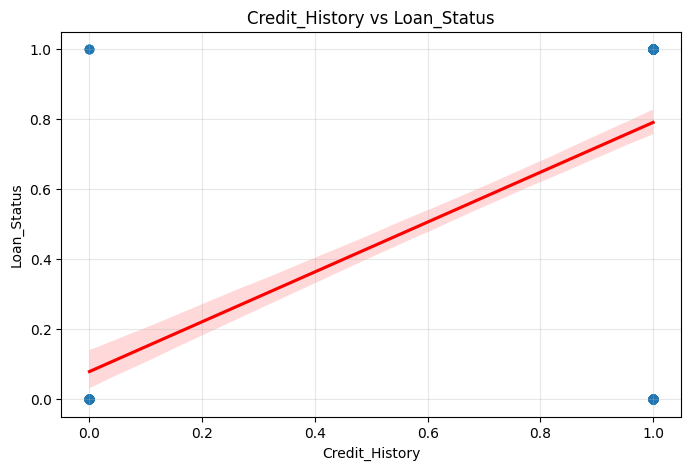

In [90]:
plot_feature_relationships(df1_cleaned, target='Loan_Status', num_features=numerical_features)

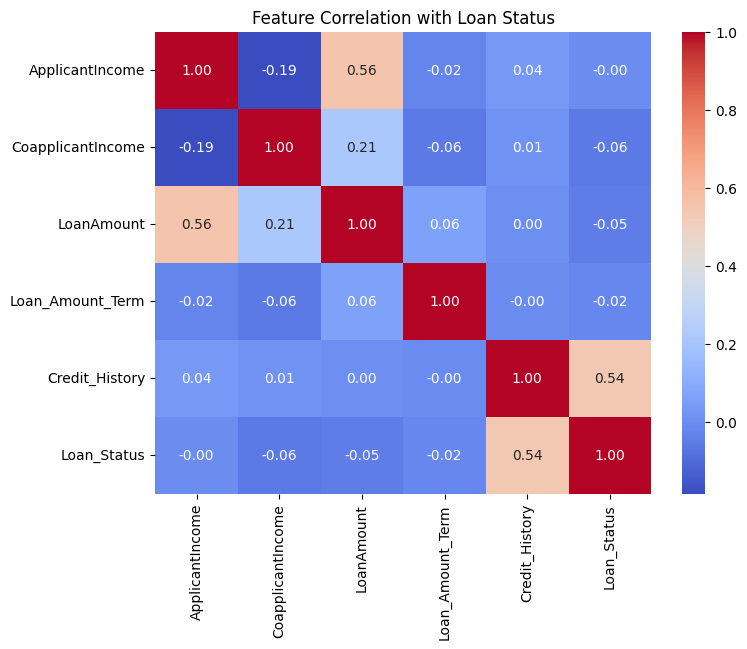

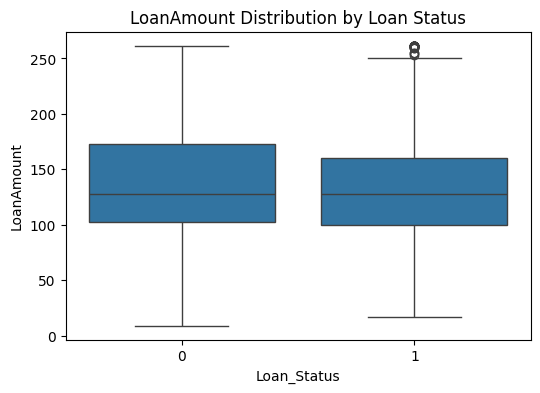

In [91]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df1_cleaned[numerical_features + ['Loan_Status']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Loan Status")
plt.show()

# Boxplot for LoanAmount vs Loan_Status
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df1_cleaned)
plt.title("LoanAmount Distribution by Loan Status")
plt.show()

13. Trivariate analysis

In [92]:
def trivariate_plot(df1_cleaned, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df1_cleaned, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()

In [93]:
num_features.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Property_rural', 'Property_semiurban',
       'Property_urban'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

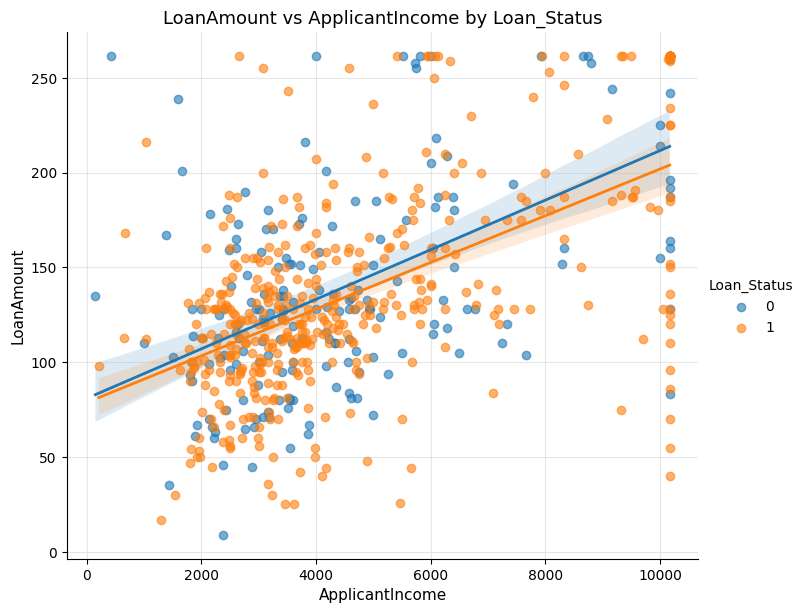

In [94]:
trivariate_plot(df1_cleaned, 'ApplicantIncome', 'LoanAmount', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

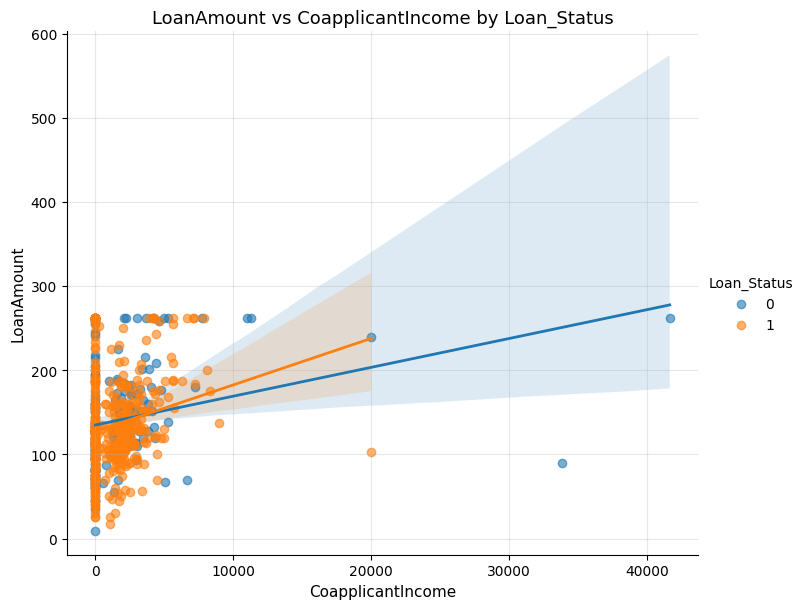

In [95]:
trivariate_plot(df1_cleaned, 'CoapplicantIncome', 'LoanAmount', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

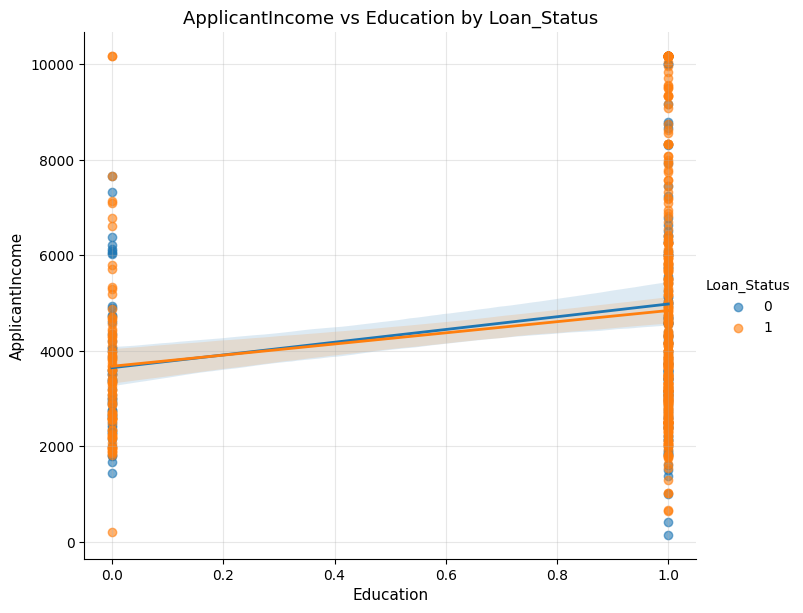

In [96]:
trivariate_plot(df1_cleaned, 'Education', 'ApplicantIncome', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

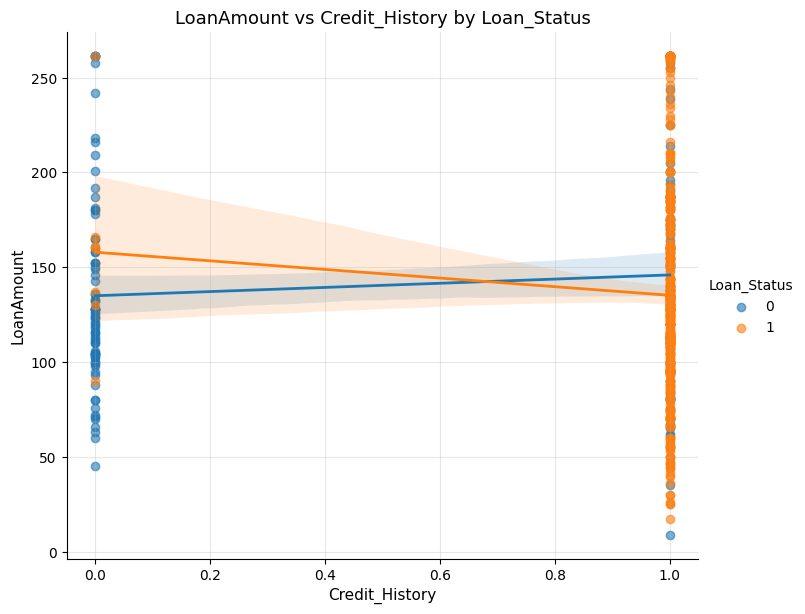

In [97]:
trivariate_plot(df1_cleaned, 'Credit_History', 'LoanAmount', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

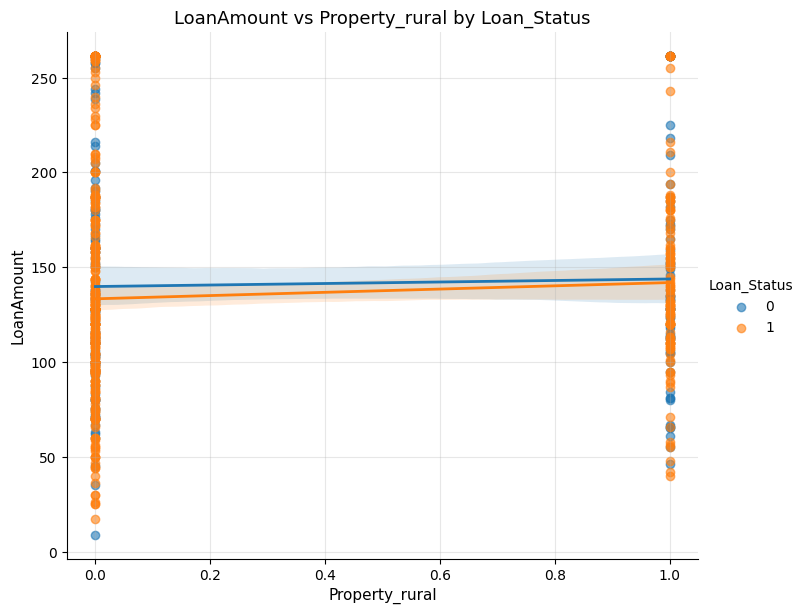

In [98]:
trivariate_plot(df1_cleaned, 'Property_rural', 'LoanAmount', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

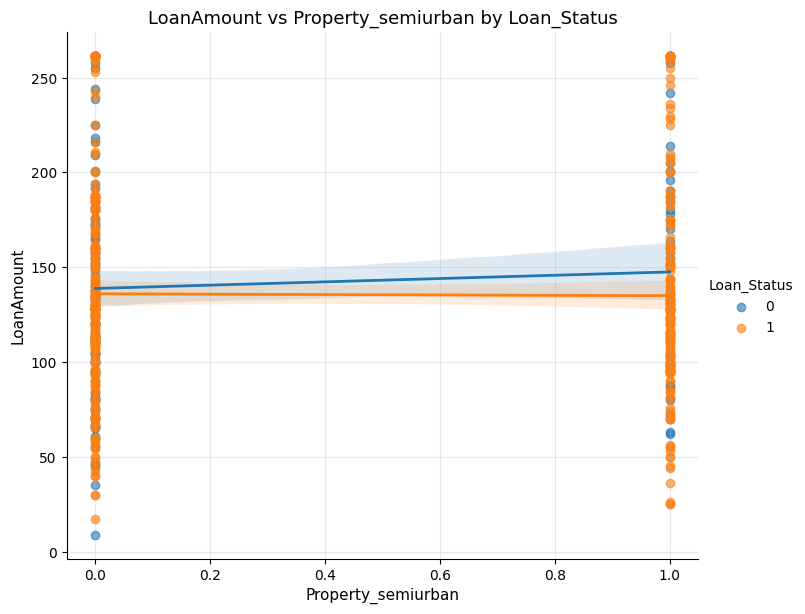

In [99]:
trivariate_plot(df1_cleaned, 'Property_semiurban', 'LoanAmount', 'Loan_Status')

<Figure size 800x600 with 0 Axes>

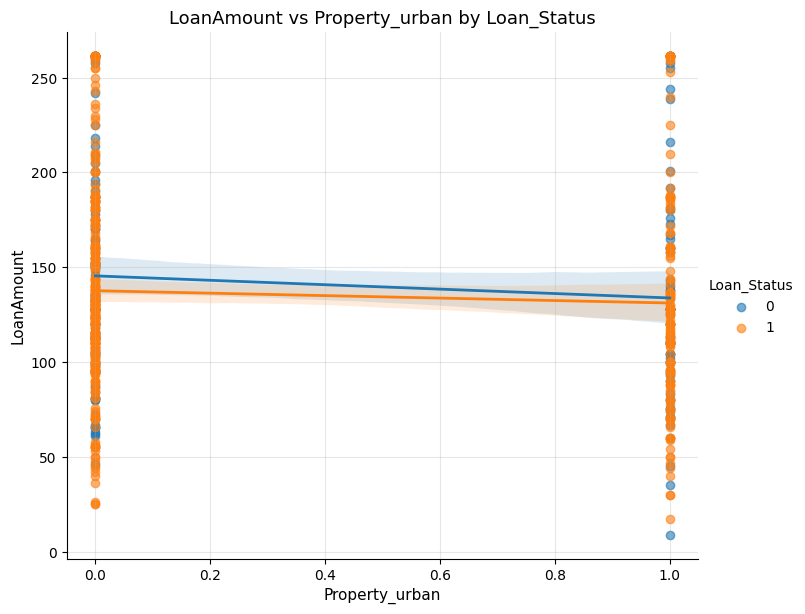

In [100]:
trivariate_plot(df1_cleaned, 'Property_urban', 'LoanAmount', 'Loan_Status')

In [101]:
def grouped_summary(df):
    """
    Computes summary statistics grouped by wine quality.
    """
    summary = df1_cleaned.groupby('Loan_Status').mean(numeric_only=True).round(2)
    return summary

In [102]:
grouped_summary(num_features)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_rural,Property_semiurban,Property_urban
Loan_Status,,,,,,,,,,,,
0,0.81,0.59,0.73,0.14,4618.74,1877.81,141.27,344.56,0.57,0.36,0.28,0.36
1,0.82,0.68,0.81,0.13,4616.37,1504.52,135.59,341.43,0.98,0.26,0.42,0.32


14. Top correlations with loan amount

In [ ]:
print("\nCorrelation with LoanAmount:\n", corr['LoanAmount'].sort_values(ascending=False))



Correlation with LoanAmount:
 LoanAmount            1.000000
ApplicantIncome       0.557953
CoapplicantIncome     0.214491
Married               0.177417
Education             0.176194
Gender                0.143426
Self_Employed         0.114297
Loan_Amount_Term      0.063612
Property_rural        0.060927
Property_semiurban    0.007546
Credit_History        0.004320
Loan_Status          -0.047262
Property_urban       -0.066726
Name: LoanAmount, dtype: float64


SUMMARY BASED ON THE OUTPUT GENERATED FROM TOP CORRELATION WITH LOAD AMOUNT SHOWS BELOW WITH THIS INTERPRETATION

NOTE: ALL VALUES IS TO THE  NEAREST TWO NUMBER AFTER DECIMAL NUMBERS

Variable	      | Correlation with Loan Amount|	Interpretation
------------------|------------------------------|------------------------|
Applicant Income	   | 0.56	   | Moderately strong positive correlation
CoapplicantIncome	   | 0.21	   | Weak positive correlation
Married	               | 0.18	   | Weak positive correlation
Education	           | 0.18	   ||Weak positive correlation
Gender	               |0.14	    |Weak positive correlation
Self_Employed	       | 0.11	   | Very weak positive correlation
Loan_Amount_Term	   | 0.06	    |Negligible correlation
Property_Rural	       | 0.06	   | Negligible correlation
Property_Semiurban	   | 0.01	  | Almost no correlation
Credit_History	       | 0.00	    |No correlation


LOAN AMOUNT = 1.00

Remark: full EDA reports has been submitted as requested.

link: https://docs.google.com/document/d/1izuSCURpvFtYScrehQrayegjreQ2KkKK0l3oiBCiXiY/edit?tab=t.0